<a href="https://colab.research.google.com/github/aaziblim/Data-Analysis/blob/main/page_view_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [4]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [3]:
# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) &
(df['value'] <= df['value'].quantile(0.975))]

**Drawing line Plot**

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

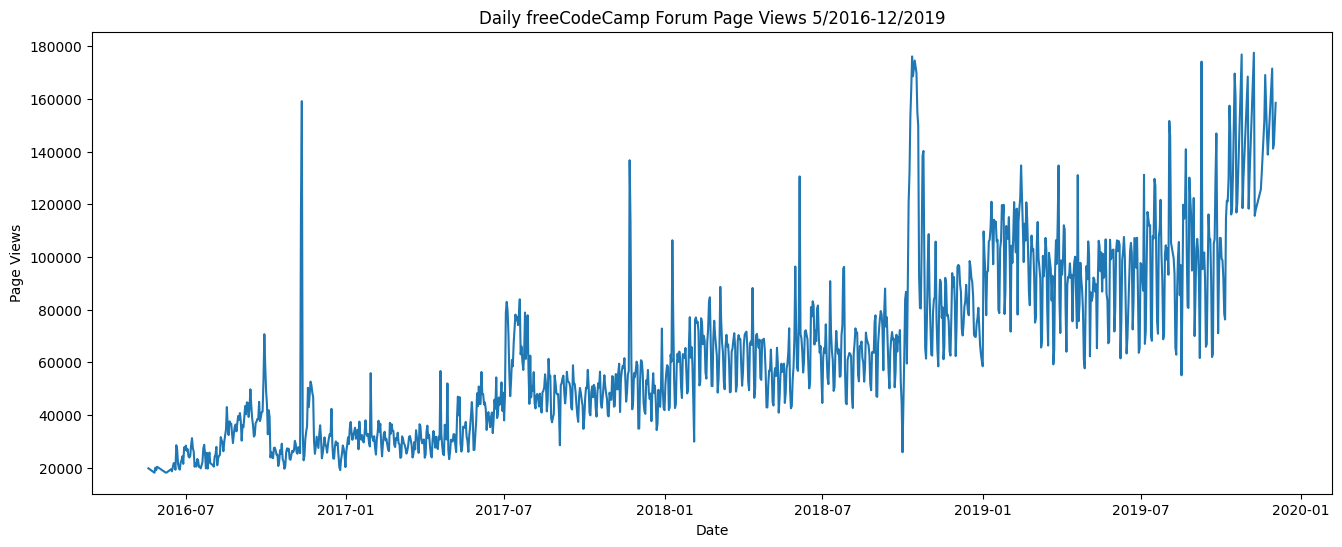

In [7]:
 # Draw line plot
fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.lineplot(data=df, x='date', y='value')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


In [8]:
fig.savefig('line_plot.png')

**Drawing bar plot**

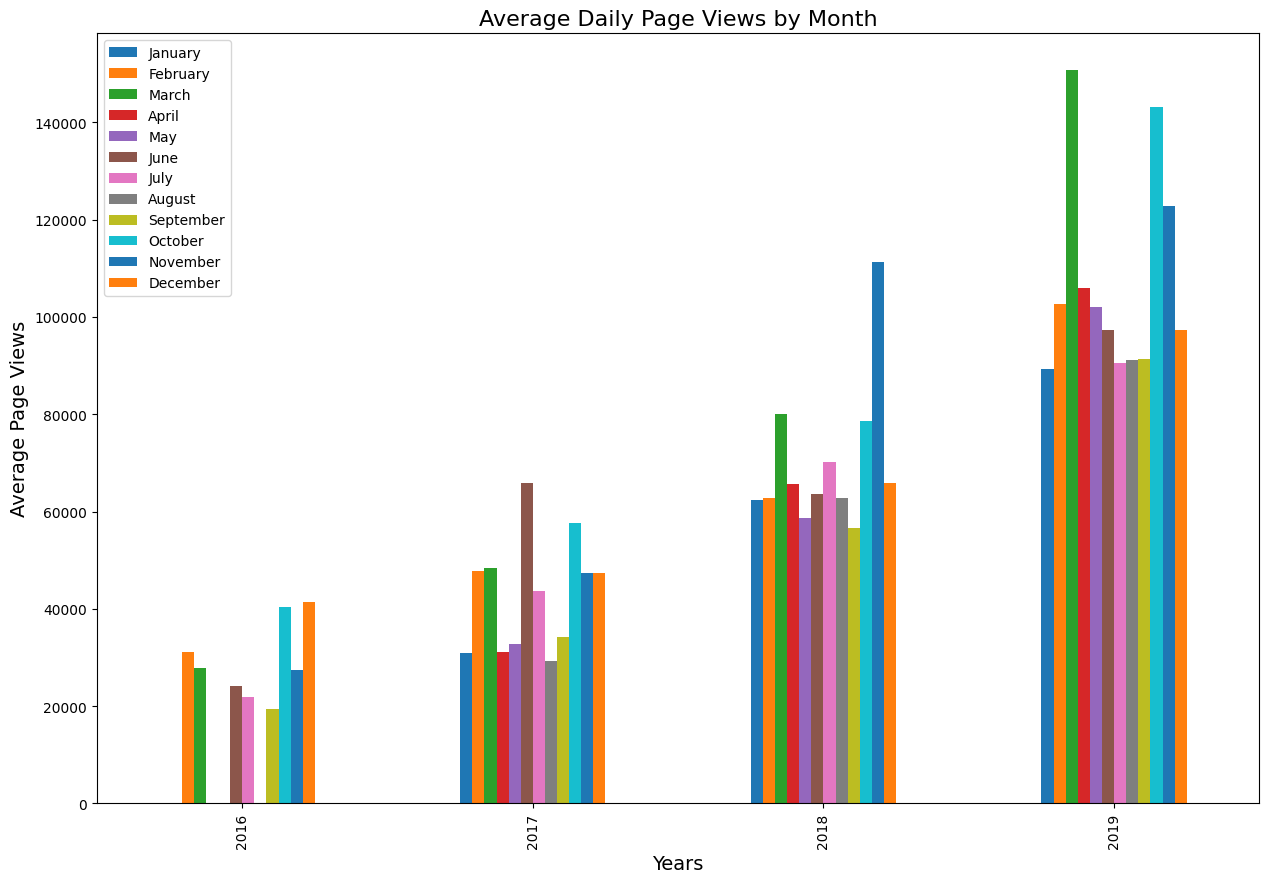

In [18]:
import matplotlib.pyplot as plt

# Assuming df_bar is properly prepared with 'year', 'month', and 'value' columns

# Grouping data by year and month to get average daily page views
df_bar = df.copy().reset_index()
df_bar['year'] = df_bar['date'].dt.year
df_bar['month'] = df_bar['date'].dt.month_name()
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

# Plotting bar plot
fig, ax = plt.subplots(figsize=(15, 10))
df_bar.plot(kind='bar', ax=ax, legend=True)

# Setting plot attributes
plt.title('Average Daily Page Views by Month', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Average Page Views', fontsize=14)
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'], fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Saving image
fig.savefig('bar_plot.png')

# Show plot
plt.show()


**Drawing box plots withs seaborn**

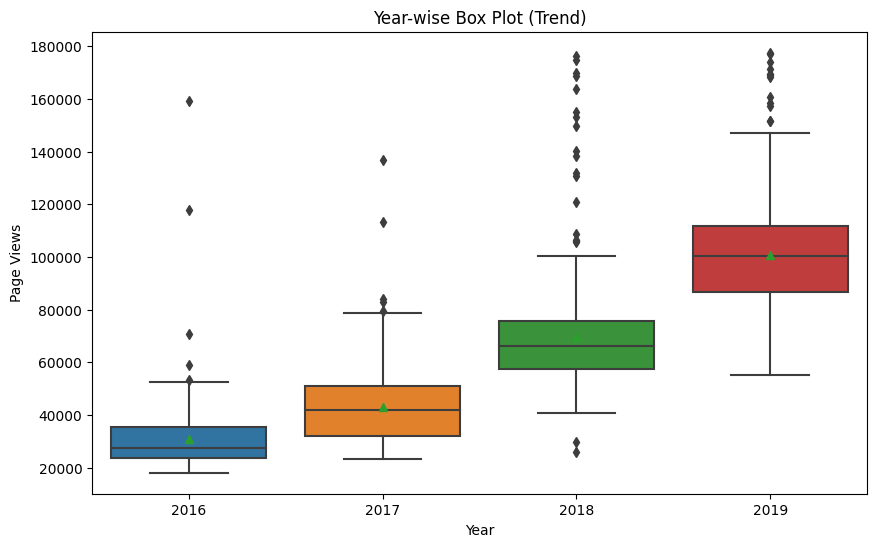

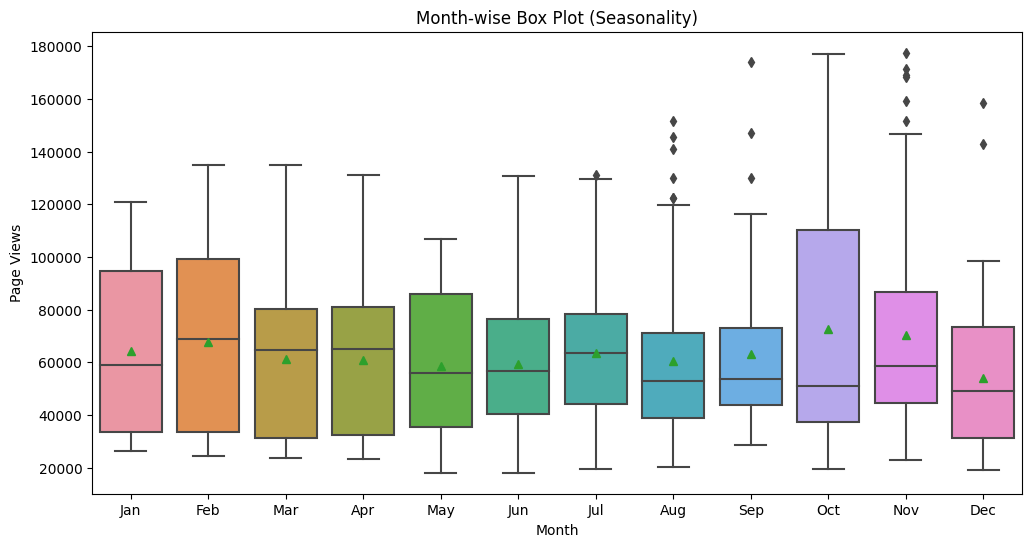

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_box is properly prepared with 'year', 'month', and 'value' columns

# Year-wise box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='value', data=df_box, showmeans=True)
plt.title("Year-wise Box Plot (Trend)")
plt.xlabel("Year")
plt.ylabel("Page Views")
plt.savefig('year_box_plot.png')
plt.show()

# Month-wise box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='value', data=df_box, showmeans=True,
            order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Month-wise Box Plot (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Page Views")
plt.savefig('month_box_plot.png')
plt.show()
